# IND320 - Assignment 1

Name: Eskil Torp Skogsholm 

GitHub link:

Streamlit app: https://ind320-assignments-esksko-d9kb5eancdgnpkvsbewu86.streamlit.app/


## AI usage

Add content

Add content

Add content

Add content

## Log

Add content

Add content

Add content

Add content

In [127]:
# Importing necessary libraries

import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [128]:
# Reading weather data and printing the first few rows to see its structure
df = pd.read_csv("../data/open-meteo-subset.csv")

# Converting "time" column to datetime format 
df["time"] = pd.to_datetime(df["time"])

# First 5 rows of the dataset
df.head()

# Print dataset info
print("\nDataset Info:")
print(df.info())

# Print descriptive statistics
print("\nDescriptive Statistics:")
display(df.describe())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   time                    8760 non-null   datetime64[ns]
 1   temperature_2m (°C)     8760 non-null   float64       
 2   precipitation (mm)      8760 non-null   float64       
 3   wind_speed_10m (m/s)    8760 non-null   float64       
 4   wind_gusts_10m (m/s)    8760 non-null   float64       
 5   wind_direction_10m (°)  8760 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 410.8 KB
None

Descriptive Statistics:


,time,temperature_2m (°C),precipitation (mm),wind_speed_10m (m/s),wind_gusts_10m (m/s),wind_direction_10m (°)
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,2020-07-01 11:30:00,-0.394909,0.222854,3.661689,8.300719,212.209589
min,2020-01-01 00:00:00,-19.300000,0.000000,0.100000,0.200000,0.000000
25%,2020-04-01 05:45:00,-4.900000,0.000000,1.800000,4.500000,128.000000
50%,2020-07-01 11:30:00,-1.000000,0.000000,3.300000,7.700000,238.000000
75%,2020-09-30 17:15:00,4.100000,0.200000,5.100000,11.500000,292.000000
max,2020-12-30 23:00:00,19.900000,5.800000,13.600000,28.700000,360.000000
std,NaN,6.711903,0.493747,2.253210,5.098909,91.371980


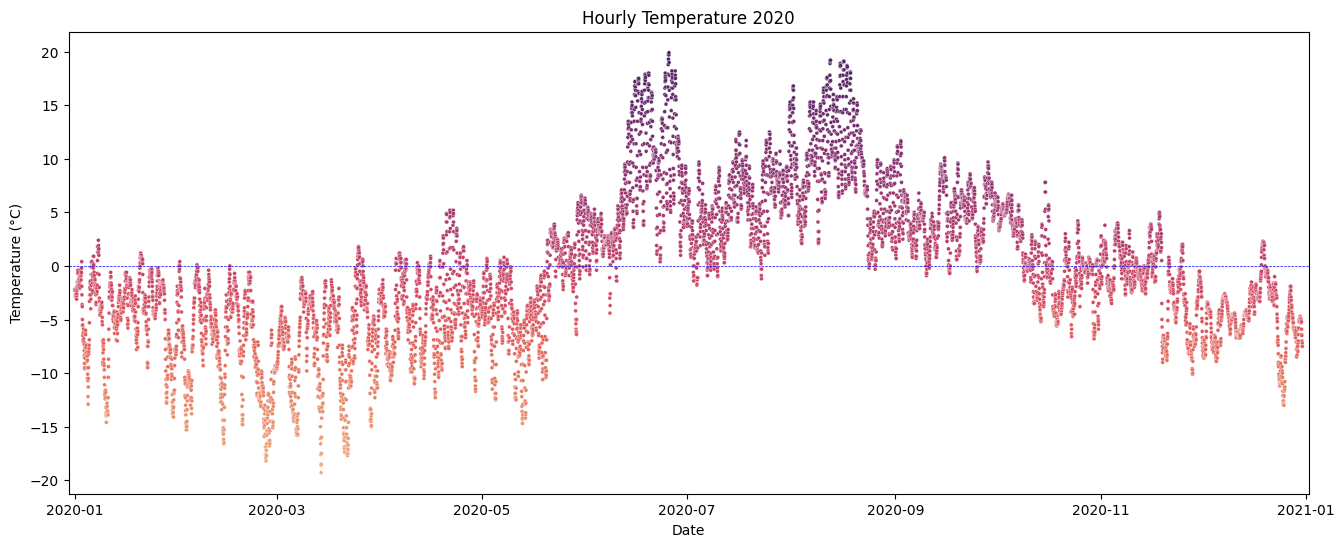

In [129]:
# Plotting temperature_2m (°C)
plt.figure(figsize=(16, 6)) 

sns.scatterplot(data=df, x="time", y="temperature_2m (°C)", hue="temperature_2m (°C)", palette="flare", legend=None, alpha=1, label="Hourly Temperature", s=8)
plt.title("Hourly Temperature 2020")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.margins(x=0.005)
plt.axhline(0, color='blue', linestyle='--', linewidth=0.5)


     month  total_precipitation
0  2020-01                315.8
1  2020-02                288.8
2  2020-03                192.7
3  2020-04                118.9
4  2020-05                 86.6


C:\Users\esksk\AppData\Local\Temp\ipykernel_26100\955257594.py:17: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:skyblue_r'` for the same effect.

  sns.barplot(


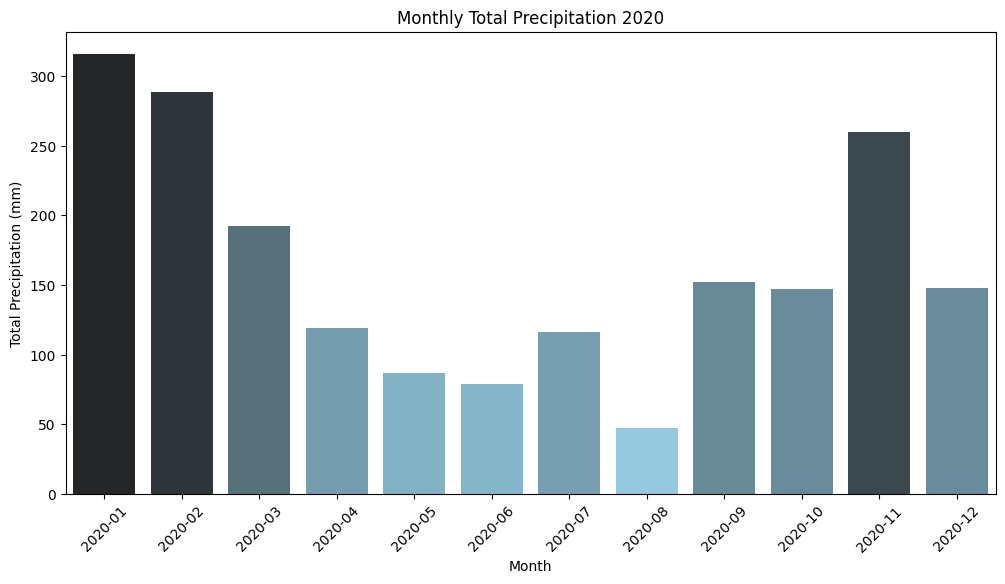

In [158]:
# Group by month instead of day
monthly_precipitation = (df.groupby(df["time"].dt.to_period("M"))["precipitation (mm)"].sum().reset_index())

# Convert back to timestamp for plotting
monthly_precipitation["time"] = monthly_precipitation["time"].dt.to_timestamp()

# Rename for clarity
monthly_precipitation = monthly_precipitation.rename(
    columns={"time": "month", "precipitation (mm)": "total_precipitation"}
)
monthly_precipitation["month"] = monthly_precipitation["month"].dt.strftime("%Y-%m")

print(monthly_precipitation.head())

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=monthly_precipitation,
    x="month",
    y="total_precipitation",
    color="skyblue_r",
    hue="total_precipitation",
)
plt.title("Monthly Total Precipitation 2020")
plt.xlabel("Month")
plt.ylabel("Total Precipitation (mm)")
plt.xticks(rotation=45)  # rotate labels for readability
plt.legend().remove()  # remove legend for cleaner look
plt.show()
